In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
from scipy.optimize import curve_fit
plt.rcParams['font.family'] = 'Hiragino Sans'

# カーブフィッティング

## 回帰分析

### サッカー選手のプロフィール

In [2]:
data = pd.read_csv('./chap_3/soccer_player_europe_2017.csv')

In [4]:
data.loc[data['weight']==0]

,name,player_id,team_id,role,height,weight,foot,nationality,birth_area,birthday,league
403,K_Taylor,515791,1659,MD,0,0,NaN,England,England,1999/08/28,England
559,E_Taha,404227,3772,FW,180,0,right,France,France,1999/03/14,France
645,B_Vérité,499200,3776,MD,0,0,NaN,France,France,1999/04/21,France
691,I_Aaneba,449882,3779,DF,0,0,right,France,France,1999/05/29,France
740,Vagner,351851,3782,MD,0,0,right,Cap_Verd_Islands,Cap_Verd_Islands,1996/01/10,France
897,R_Aï_Nouri,565016,3799,DF,0,0,NaN,France,France,2001/06/06,France
1198,J_Hoffmanns,337781,2454,DF,176,0,right,Germany,Germany,1997/02/26,Germany
1203,F_Mayer,391551,2454,DF,190,0,right,Germany,Germany,1998/03/04,Germany
1232,M_Sündermann,366197,2455,GK,186,0,right,Germany,Germany,1998/05/16,Germany
1904,L_Sparandeo,360778,3219,DF,0,0,left,Italy,Italy,1999/08/18,Italy


In [5]:
# weightが0のデータを削除
data = data.loc[data['weight']!=0]

Text(0, 0.5, 'height')

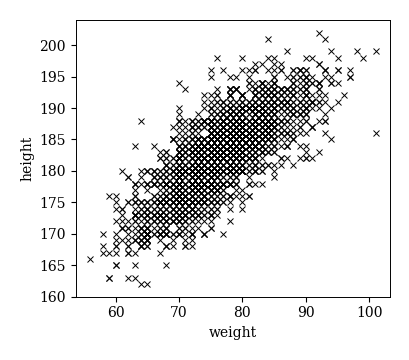

In [6]:
# 散布図の描画
fig, ax = plt.subplots(figsize=(4, 3.5))
ax.plot(data['weight'], data['height'], 'x')
ax.set_xlabel('weight'); ax.set_ylabel('height')

In [8]:
# フィッティング関数
f_linear = lambda x, a, b: a*x + b

Text(0, 0.5, 'height')

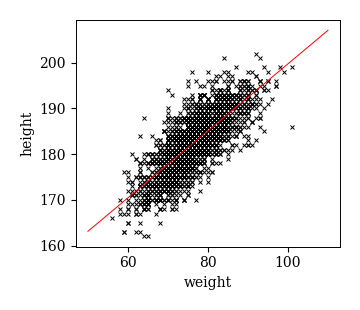

In [11]:
p_opt = curve_fit(f_linear, data['weight'], data['height'])[0]

fig, ax = plt.subplots()
ax.plot(data['weight'], data['height'], 'x', ms=3)
x = np.linspace(50, 110, 100)
ax.plot(x, f_linear(x, p_opt[0], p_opt[1]), 'r-', mfc='None')
ax.set_xlabel('weight'); ax.set_ylabel('height')

### Covid19の感染者数推移

- https://github.com/CSSEGISandData/COVID-19
- https://www.kaggle.com/code/wuhong60909/logistic-growth-model-2020-04-22/notebook#Minimized-loss-function:-scipy.optimize.minimize

#### データの整形

In [3]:
df = pd.read_csv('./chap_3/time_series_covid19_confirmed_global.csv', header=0)

In [4]:
df = df.loc[df['Country/Region'] == 'Korea, South']
date = df.iloc[:, 4:].columns
num = df.iloc[:, 4:].values[0]

In [5]:
date = pd.to_datetime(date)
data = pd.DataFrame({'date': date, 'num': num})
data.to_csv('./chap_3/covid19_korea.csv', index=False)

In [6]:
data

,date,num
0,2020-01-22,1
1,2020-01-23,1
2,2020-01-24,2
3,2020-01-25,2
4,2020-01-26,3
...,...,...
1138,2023-03-05,30569215
1139,2023-03-06,30581499
1140,2023-03-07,30594297
1141,2023-03-08,30605187


#### 演習問題解答

In [7]:
# フィッティング関数の定義
f_sigmoid = lambda t, a, b, c: a*(1+b*np.exp(-np.clip(c*t, -709, 100000)))**(-1)

In [8]:
# データを読み込む
data = pd.read_csv('./chap_3/covid19_korea.csv', header=0)
data

,date,num
0,2020-01-22,1
1,2020-01-23,1
2,2020-01-24,2
3,2020-01-25,2
4,2020-01-26,3
...,...,...
1138,2023-03-05,30569215
1139,2023-03-06,30581499
1140,2023-03-07,30594297
1141,2023-03-08,30605187


In [9]:
data.index

RangeIndex(start=0, stop=1143, step=1)

Text(0, 0.5, 'number of infected')

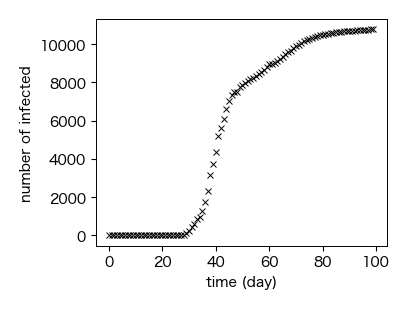

In [10]:
# 散布図の描画
fig, ax = plt.subplots(figsize=(4, 3))
ax.plot(data.index[:100], data['num'][:100], 'x')
ax.set_xlabel('time (day)'); ax.set_ylabel('number of infected')

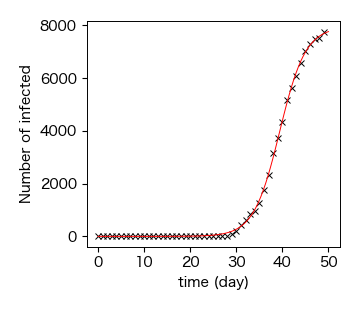

In [11]:
p_opt = curve_fit(f_sigmoid, data.index[:50], data['num'][:50])[0]

fig, ax = plt.subplots()
ax.plot(data.index[:50], data['num'][:50], 'x')
x = np.linspace(0, 50, 100)
ax.plot(x, f_sigmoid(x, p_opt[0], p_opt[1], p_opt[2]), 'r-', mfc='None')

ax.set_xlabel('time (day)'); ax.set_ylabel('Number of infected');

In [12]:
p_opt

array([7.94804298e+03, 1.23346612e+06, 3.55899282e-01])

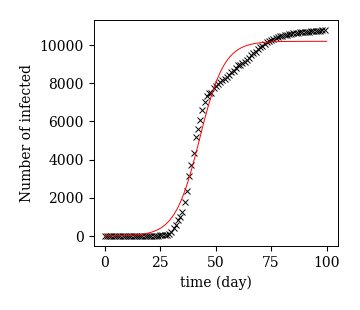

In [18]:
p_opt = curve_fit(f_sigmoid, data.index[:100], data['num'][:100])[0]

fig, ax = plt.subplots()
ax.plot(data.index[:100], data['num'][:100], 'x')
x = np.linspace(0, 100, 100)
ax.plot(x, f_sigmoid(x, p_opt[0], p_opt[1], p_opt[2]), 'r-', mfc='None')

ax.set_xlabel('time (day)'); ax.set_ylabel('Number of infected');

## 最尤推定

- http://bebi103.caltech.edu.s3-website-us-east-1.amazonaws.com/2019a/content/lessons/lesson_08/numerical_mle.html
- https://www.kamishima.net/mlmpyja/lr/optimization.html
- https://qiita.com/Gyutan/items/97b7cb7d30772f2283a1
- https://datascience.stackexchange.com/questions/112563/using-scipy-minimize-to-find-the-maximum-likelihood-estimates-for-multivariate-g
- https://qiita.com/katsu1110/items/5792250de638e377ee14

使用できる最小の数

In [2]:
print(np.finfo(np.float64).tiny)

2.2250738585072014e-308


ベルヌーイ分布

In [35]:
import numpy as np
from scipy.stats import bernoulli
import scipy as sp

# データの生成
# np.random.seed(seed=32)
x = bernoulli.rvs(p=0.1, size=100)

# 負の対数尤度を計算する関数
def neg_log_likelihood(p):
    return -np.sum(np.log(np.maximum(bernoulli.pmf(x, p), 1e-100))) # 0をlogに入れると-infになるのを防ぐためにnp.maximumを使う

# パラメータの初期値
x0 = 0.5

# パラメータの制約
constraints = [{'type': 'ineq', 'fun': lambda p: p - 1e-6}, # p > 0
               {'type': 'ineq', 'fun': lambda p: 1 - p - 1e-6}] # p < 1

# 負の対数尤度を最小化
result = sp.optimize.minimize(neg_log_likelihood, x0=x0, constraints=constraints)

print(result)

     fun: 19.85152473346694
     jac: array([0.04098678])
 message: 'Optimization terminated successfully'
    nfev: 36
     nit: 13
    njev: 13
  status: 0
 success: True
       x: array([0.05001947])


正規分布

In [41]:
import numpy as np
from scipy.stats import norm
import scipy as sp

# データの生成
# np.random.seed(seed=32)
x = np.random.normal(loc=100, scale=20, size=100)

# 負の対数尤度を計算する関数
def neg_log_likelihood(params):
    mu, sigma = params
    return -np.sum(np.log(np.maximum(norm.pdf(x, mu, sigma), 1e-100)))

# パラメータの初期値
x0 = np.array([100, 20])

# パラメータの制約
constraints = [{'type': 'ineq', 'fun': lambda params: params[1] - 1e-6}] # sigma > 0

# 負の対数尤度を最小化
result = sp.optimize.minimize(neg_log_likelihood, x0=x0, constraints=constraints)

print(result)

     fun: 445.228377611385
     jac: array([6.10351562e-05, 2.28881836e-05])
 message: 'Optimization terminated successfully'
    nfev: 24
     nit: 8
    njev: 8
  status: 0
 success: True
       x: array([100.39742674,  20.76663164])


In [5]:
ret

(array([0.19934641, 0.33006536, 0.25816993, 0.13398693, 0.05228758,
        0.0130719 , 0.0130719 ]),
 array([0, 1, 2, 3, 4, 5, 6, 7]),
 <BarContainer object of 7 artists>)

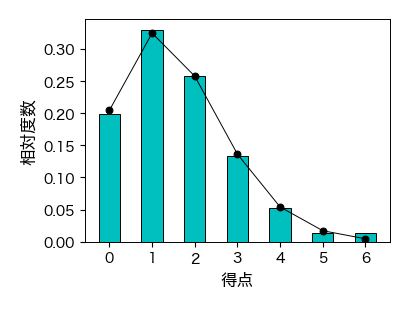

In [4]:
# データの読み込み
data = pd.read_csv('./chap_4/score_germany.csv')
data = data['home']

# ヒストグラムを描画する
fig, ax = plt.subplots(figsize=(4, 3))
ret = ax.hist(data, 
              bins=np.arange(data.max()+2),  # 階級の左端の値を指定する
              align='left',  # バーの中央を階級の左端に合わせる
              density=1,     # 縦軸を相対度数にする
              color='c',       
              edgecolor='k', 
              rwidth=0.5)

k, fk = ret[1][:-1], ret[0] # 階級値と相対度数

# 最小二乗法によるフィッティング
def f_poisson(k, lmd):
    return sp.stats.poisson.pmf(k, lmd)

p_opt, p_cov = sp.optimize.curve_fit(f_poisson, k, fk)
ax.plot(k, sp.stats.poisson.pmf(k, mu=p_opt), 'k-o')

# 装飾
ax.set_xlabel('得点', fontsize=12)
ax.set_ylabel('相対度数', fontsize=12)
ax.set_xticks(k);

In [6]:
p_opt

array([1.58679078])

Text(0, 0.5, '相対度数')

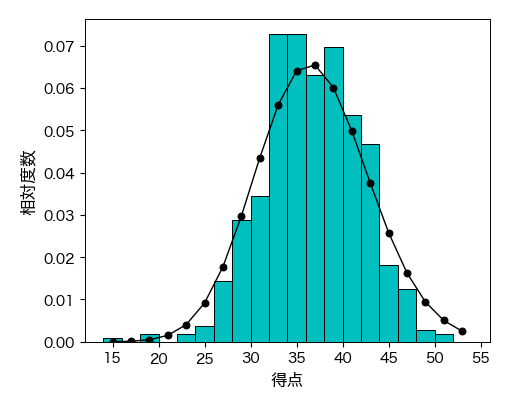

In [11]:
# データの読み込み
data = pd.read_csv('./chap_4/score_nba.csv')
data = data['home']

# 度数分布の計算（NumPy）
ret = np.histogram(data, 
                   bins=np.arange(14, 55, 2), 
                   density=1)
k = 0.5*(ret[1][1:]+ret[1][:-1]) # 階級の中央値を階級値とする
fk = ret[0] # 階級値に対応する度数

# 最小二乗法によるフィッティング
def f_poisson(k, lmd):
    return sp.stats.poisson.pmf(k, lmd)

p_opt, p_cov = sp.optimize.curve_fit(f_poisson, k, fk, p0=30)

# ヒストグラムの描画
fig, ax = plt.subplots(figsize=(5, 4))
ax.bar(k, fk, width=np.diff(k)[0], color='c', edgecolor='k', align='center')
ax.plot(k, sp.stats.poisson.pmf(k, mu=p_opt), 'ko-', lw=1)

# 装飾
ax.set_xlabel('得点', fontsize=12)
ax.set_ylabel('相対度数', fontsize=12)
# ax.set_xticks(k);

In [12]:
k

array([15., 17., 19., 21., 23., 25., 27., 29., 31., 33., 35., 37., 39.,
       41., 43., 45., 47., 49., 51., 53.])

In [8]:
p_opt

array([36.3892584])

In [93]:
pd.DataFrame({'k_min': ret[1][:-1], 'k_max': ret[1][1:], 'k':k, 'fk':fk})

,k_min,k_max,k,fk
0,14.000000,16.466667,15.233333,0.000775
1,16.466667,18.933333,17.700000,0.000775
2,18.933333,21.400000,20.166667,0.000775
3,21.400000,23.866667,22.633333,0.001550
4,23.866667,26.333333,25.100000,0.007752
5,26.333333,28.800000,27.566667,0.020929
6,28.800000,31.266667,30.033333,0.037207
7,31.266667,33.733333,32.500000,0.058912
8,33.733333,36.200000,34.966667,0.082941
9,36.200000,38.666667,37.433333,0.058137
